In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ignore warnings

import warnings
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option('display.max_columns', None)

# Import psql to run queries

import pandasql as psql

In [2]:
# Load the Social_Network_Ads dataset

SNAdata = pd.read_csv(r"D:\iiit notes\Programming\AI\Internship practice\65 Session 02 - Sep - 2021\Social_Network_Ads.csv", header = 0)
SNAdata.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# Display information of the dataset

SNAdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
# Character variables to encode by using LabelEncoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
SNAdata['Gender'] = le.fit_transform(SNAdata['Gender'])
SNAdata.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [5]:
# Delete the 'User ID'

SNAdata_F1 = SNAdata.copy()

del SNAdata['User ID']

SNAdata.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [6]:
# Identify the Independent and Target(dependent) variable

IndepVar = []
for col in SNAdata.columns:
    if col != 'Purchased':
        IndepVar.append(col)

TargetVar = 'Purchased'        
x = SNAdata[IndepVar]
y = SNAdata[TargetVar]

In [7]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify = y, random_state=42)
x_test_F1 = x_test.copy()
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((320, 3), (80, 3), (320,), (80,))

In [8]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmsclaer = MinMaxScaler(feature_range=(0,1))

x_train = mmsclaer.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmsclaer.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [9]:
# Training the Naive Bayes model (GaussianNB) on the Training set

from sklearn.naive_bayes import GaussianNB

modelGNB = GaussianNB(priors=None, var_smoothing=1e-09)

# fit the model

modelGNB.fit(x_train, y_train)

GaussianNB()

In [10]:
# Predict the model with test data 
    
y_pred = modelGNB.predict(x_test)
    
# confusion matrix in sklearn 

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

# actual values

actual = y_test

# predicted values 

predicted = y_pred 

# confusion matrix 

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None) 
print('Confusion matrix : \n', matrix) 

# outcome values order in sklearn 

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1) 

print('Outcome values : \n', tp, fn, fp, tn) 

# classification report for precision, recall f1-score and accuracy 

matrix = classification_report(actual,predicted,labels=[1,0]) 
print('Classification report : \n',matrix) 

# calculating the metrics 

sensitivity = round(tp/(tp+fn), 3) 
specificity = round(tn/(tn+fp), 3); 
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3); 
balanced_accuracy = round((sensitivity+specificity)/2, 3); 
precision = round(tp/(tp+fp), 3); 
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model 

from math import sqrt 

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn) 
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3) 

print('Accuracy :', round(accuracy*100, 2),'%') 
print('Precision :', round(precision*100, 2),'%') 
print('Recall :', round(sensitivity*100,2), '%') 
print('F1 Score :', f1Score) 
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%') 
print('MCC :', MCC) 

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score 

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

Confusion matrix : 
 [[22  7]
 [ 4 47]]
Outcome values : 
 22 7 4 47
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.76      0.80        29
           0       0.87      0.92      0.90        51

    accuracy                           0.86        80
   macro avg       0.86      0.84      0.85        80
weighted avg       0.86      0.86      0.86        80

Accuracy : 86.2 %
Precision : 84.6 %
Recall : 75.9 %
F1 Score : 0.8
Balanced Accuracy : 84.0 %
MCC : 0.698
roc_auc_score: 0.84


In [11]:
# Area under ROC curve 
    
from sklearn.metrics import roc_curve, roc_auc_score 
    
y_score1 = modelGNB.predict_proba(x_test)[:,1] 
    
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1) 
    
print('roc_auc_score:', round(roc_auc_score(y_test, y_score1), 3))

roc_auc_score: 0.949


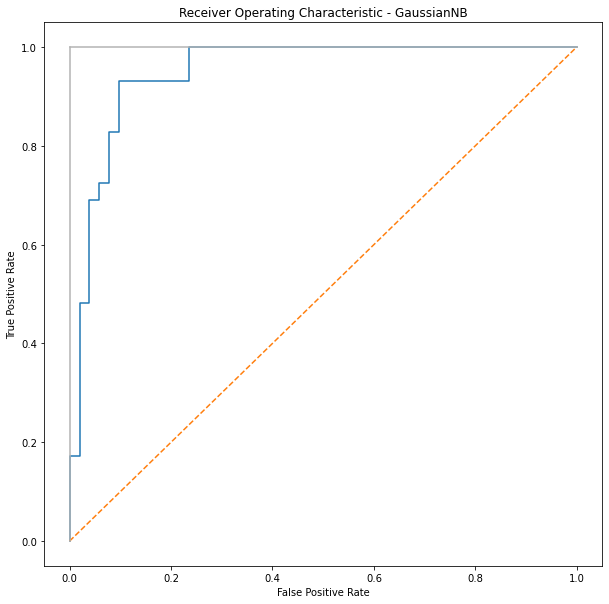

In [12]:
# Plot the Receiver Operating Characteristic(RoC) curve 

from matplotlib import pyplot 

pyplot.subplots(1, figsize=(10,10)) 
pyplot.title('Receiver Operating Characteristic - GaussianNB') 
pyplot.plot(false_positive_rate1, true_positive_rate1) 
pyplot.plot([0, 1], ls="--") 
pyplot.plot([0, 0], [1, 0] , c=".7"), pyplot.plot([1, 1] , c=".7") 
pyplot.ylabel('True Positive Rate') 
pyplot.xlabel('False Positive Rate') 
pyplot.show() 

# The AUC value lies between 0.5 to 1 where 0.5 denotes a bad classifer and 1 denotes an excellent classifier

In [13]:
# Training the Naive Bayes model (BernoulliNB) on the Training set 

from sklearn.naive_bayes import BernoulliNB 

modelBNB = BernoulliNB(alpha=1.0, binarize=0.25, fit_prior=True, class_prior=None) 

# Fit the model 

modelBNB.fit(x_train, y_train)

BernoulliNB(binarize=0.25)

In [14]:
# Predict the model with test data 
    
y1_pred = modelBNB.predict(x_test)
    
# confusion matrix in sklearn 

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

# actual values

actual = y_test

# predicted values 

predicted = y1_pred 

# confusion matrix 

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None) 
print('Confusion matrix : \n', matrix) 

# outcome values order in sklearn 

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1) 

print('Outcome values : \n', tp, fn, fp, tn) 

# classification report for precision, recall f1-score and accuracy 

matrix = classification_report(actual,predicted,labels=[1,0]) 
print('Classification report : \n',matrix) 

# calculating the metrics 

sensitivity = round(tp/(tp+fn), 3) 
specificity = round(tn/(tn+fp), 3); 
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3); 
balanced_accuracy = round((sensitivity+specificity)/2, 3); 
precision = round(tp/(tp+fp), 3); 
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model 

from math import sqrt 

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn) 
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3) 

print('Accuracy :', round(accuracy*100, 2),'%') 
print('Precision :', round(precision*100, 2),'%') 
print('Recall :', round(sensitivity*100,2), '%') 
print('F1 Score :', f1Score) 
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%') 
print('MCC :', MCC) 

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score 

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

Confusion matrix : 
 [[ 0 29]
 [ 0 51]]
Outcome values : 
 0 29 0 51
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        29
           0       0.64      1.00      0.78        51

    accuracy                           0.64        80
   macro avg       0.32      0.50      0.39        80
weighted avg       0.41      0.64      0.50        80

Accuracy : 63.8 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


In [15]:
# Area under ROC curve 
    
from sklearn.metrics import roc_curve, roc_auc_score 
    
y_score2 = modelBNB.predict_proba(x_test)[:,1] 
    
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2) 
    
print('roc_auc_score:', round(roc_auc_score(y_test, y_score2), 3))

roc_auc_score: 0.57


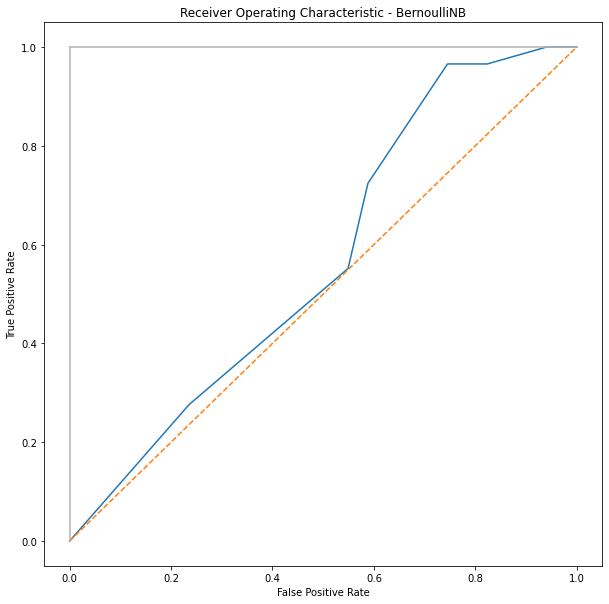

In [16]:
# Plot the Receiver Operating Characteristic(RoC) curve 

from matplotlib import pyplot 

pyplot.subplots(1, figsize=(10,10)) 
pyplot.title('Receiver Operating Characteristic - BernoulliNB') 
pyplot.plot(false_positive_rate2, true_positive_rate2) 
pyplot.plot([0, 1], ls="--") 
pyplot.plot([0, 0], [1, 0] , c=".7"), pyplot.plot([1, 1] , c=".7") 
pyplot.ylabel('True Positive Rate') 
pyplot.xlabel('False Positive Rate') 
pyplot.show() 

# The AUC value lies between 0.5 to 1 where 0.5 denotes a bad classifer and 1 denotes an excellent classifier

In [17]:
# Training the Naive Bayes model (MultinomialNB) on the Training set 

from sklearn.naive_bayes import MultinomialNB 
modelMNB = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None) 

# Fit the model 

modelMNB.fit(x_train, y_train)

MultinomialNB()

In [18]:
# Predict the model with test data 
    
y2_pred = modelMNB.predict(x_test)
    
# confusion matrix in sklearn 

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

# actual values

actual = y_test

# predicted values 

predicted = y2_pred 

# confusion matrix 

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None) 
print('Confusion matrix : \n', matrix) 

# outcome values order in sklearn 

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1) 

print('Outcome values : \n', tp, fn, fp, tn) 

# classification report for precision, recall f1-score and accuracy 

matrix = classification_report(actual,predicted,labels=[1,0]) 
print('Classification report : \n',matrix) 

# calculating the metrics 

sensitivity = round(tp/(tp+fn), 3) 
specificity = round(tn/(tn+fp), 3); 
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3); 
balanced_accuracy = round((sensitivity+specificity)/2, 3); 
precision = round(tp/(tp+fp), 3); 
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model 

from math import sqrt 

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn) 
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3) 

print('Accuracy :', round(accuracy*100, 2),'%') 
print('Precision :', round(precision*100, 2),'%') 
print('Recall :', round(sensitivity*100,2), '%') 
print('F1 Score :', f1Score) 
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%') 
print('MCC :', MCC) 

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score 

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

Confusion matrix : 
 [[ 0 29]
 [ 0 51]]
Outcome values : 
 0 29 0 51
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        29
           0       0.64      1.00      0.78        51

    accuracy                           0.64        80
   macro avg       0.32      0.50      0.39        80
weighted avg       0.41      0.64      0.50        80

Accuracy : 63.8 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


In [19]:
# Area under ROC curve 
    
from sklearn.metrics import roc_curve, roc_auc_score 
    
y_score3 = modelMNB.predict_proba(x_test)[:,1] 
    
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3) 
    
print('roc_auc_score:', round(roc_auc_score(y_test, y_score3), 3))

roc_auc_score: 0.765


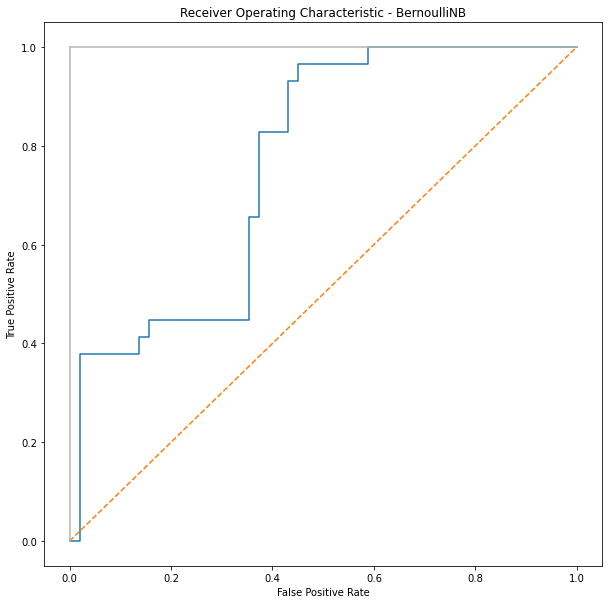

In [20]:
# Plot the Receiver Operating Characteristic(RoC) curve 

from matplotlib import pyplot 

pyplot.subplots(1, figsize=(10,10)) 
pyplot.title('Receiver Operating Characteristic - BernoulliNB') 
pyplot.plot(false_positive_rate3, true_positive_rate3) 
pyplot.plot([0, 1], ls="--") 
pyplot.plot([0, 0], [1, 0] , c=".7"), pyplot.plot([1, 1] , c=".7") 
pyplot.ylabel('True Positive Rate') 
pyplot.xlabel('False Positive Rate') 
pyplot.show() 

# The AUC value lies between 0.5 to 1 where 0.5 denotes a bad classifer and 1 denotes an excellent classifier